In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [400]:

kdd = pd.read_csv("kdd_FGM.csv")
nsl = pd.read_csv("nsl_FGM.csv")
ids = pd.read_csv("ids_FGM.csv")
ciciot = pd.read_csv("ciciot_FGM.csv")
kitsune = pd.read_csv("kitsune_FGM.csv")
credit = pd.read_csv("credit_FGM.csv")
ecg = pd.read_csv("ecg_FGM.csv")

in_kdd = kdd.loc[kdd['r1']==0.,'n1'].values[0]
in_ids = ids.loc[ids['r1']==0.,'n1'].values[0]
in_kitsune = kitsune.loc[kitsune['r1']==0.,'n1'].values[0]
in_ciciot = ciciot.loc[ciciot['r1']==0.,'n1'].values[0]
in_credit = credit.loc[credit['r1']==0.,'n1'].values[0]
in_ecg = ecg.loc[ecg['r1']==0.,'n1'].values[0]


kdd['ratio'] = kdd['n2']*(1-kdd['r2'])/in_kdd
ids['ratio'] = ids['n2']*(1-ids['r2'])/in_ids
ciciot['ratio'] = ciciot['n2']*(1-ciciot['r2'])/in_ciciot
kitsune['ratio'] = kitsune['n2']*(1-kitsune['r2'])/in_kitsune
credit['ratio'] = credit['n2']*(1-credit['r2'])/in_credit
nsl['ratio'] = nsl['n2']*(1-nsl['r2'])/in_kdd
ecg['ratio'] = ecg['n2']*(1-ecg['r2'])/in_ecg

kdd['name'] ='kdd'
nsl['name'] ='nsl'
credit['name'] ='credit'
ids['name'] = 'ids'
ciciot['name'] ='ciciot'
kitsune['name'] = 'kitsune'
ecg['name'] = 'ecg'
data = pd.concat([kdd, ids, ciciot,kitsune, credit, ecg], ignore_index=True)

In [401]:
#data = data[data['name']!='ids']
data = data[data['metric']=='sdc']
data.rename(columns={'name': 'dataset'}, inplace=True)
eps = 0.0000000000000001
data['improvement'] = 100*(data.r1-data.r2)/(data.r1+eps)
data['id'] = range(len(data))
data = data.sort_values(by=['dataset', 'r1'])
data.loc[data['dataset']=='kdd', 'id'] = range(11)
data.loc[data['dataset']=='ciciot', 'id'] = range(11)
data.loc[data['dataset']=='ids', 'id'] = range(11)
data.loc[data['dataset']=='kitsune', 'id'] = range(11)
data.loc[data['dataset']=='credit', 'id'] = range(11)
data.loc[data['dataset']=='ecg', 'id'] = range(11)
data.head(40)

,metric,n1,n2,r1,r2,ratio,dataset,improvement,id
22,sdc,127298,98690,0.000000,0.000000,0.775267,ciciot,0.000000,0
23,sdc,131650,102644,0.033057,0.026548,0.784922,ciciot,19.690871,1
24,sdc,136002,104325,0.063999,0.051100,0.777656,ciciot,20.155188,2
25,sdc,140354,107738,0.093022,0.074774,0.783060,ciciot,19.616817,3
26,sdc,144706,112033,0.120299,0.098328,0.793547,ciciot,18.263578,4
27,sdc,149058,113789,0.145983,0.117929,0.788465,ciciot,19.217689,5
28,sdc,153410,116463,0.170211,0.139658,0.787114,ciciot,17.949803,6
29,sdc,157762,120582,0.193101,0.160007,0.795676,ciciot,17.138027,7
30,sdc,162114,126453,0.214762,0.180628,0.813933,ciciot,15.893875,8
31,sdc,166466,126208,0.235291,0.197539,0.795590,ciciot,16.044923,9


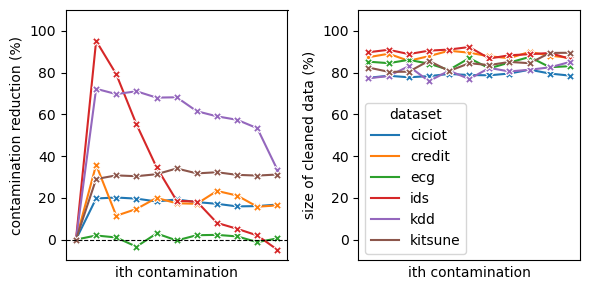

In [402]:
fig, ax = plt.subplots(ncols=2, figsize=(6, 3))
cond = data['dataset']=='ciciot'

sns.lineplot(data=data, x=data.id, y=data.improvement, hue='dataset', ax=ax[0], marker='X')
#ax.set_title(f'{subplot}'.upper())
ax[0].set_xlabel('ith contamination') 
ax[1].set_ylabel('size of cleaned data (%)')
sns.lineplot(data=data, x=data.id, y=100*data.ratio, hue='dataset', ax=ax[1], marker='X')
ax[1].set_xlabel('ith contamination') 
ax[0].set_ylabel('contamination reduction (%)')
ax[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
ax[0].legend().remove()
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_ylim(-10, 110)
ax[1].set_ylim(-10, 110)
plt.tight_layout()
plt.savefig("cleaning_ratio.pdf")
plt.show()

In [647]:
df_1 = pd.read_csv("performances_kdd_AE.csv")
df_2 = pd.read_csv("performances_kdd_OC-SVM.csv")
df_3 = pd.read_csv("performances_kdd_LOF.csv")
df_4 = pd.read_csv("performances_kdd_IF.csv")
df_kdd = pd.concat([df_1, df_2, df_3, df_4], axis=0, ignore_index=True)

In [648]:
df_1 = pd.read_csv("performances_kitsune_AE.csv")
df_2 = pd.read_csv("performances_kitsune_OC-SVM.csv")
df_3 = pd.read_csv("performances_kitsune_LOF.csv")
df_4 = pd.read_csv("performances_kitsune_IF.csv")
df_kitsune = pd.concat([df_1, df_2, df_3, df_4], axis=0, ignore_index=True)

In [649]:
df_1 = pd.read_csv("performances_ciciot_AE.csv")
df_2 = pd.read_csv("performances_ciciot_OC-SVM.csv")
df_3 = pd.read_csv("performances_ciciot_LOF.csv")
df_4 = pd.read_csv("performances_ciciot_IF.csv")
df_ciciot = pd.concat([df_1, df_2, df_3, df_4], axis=0, ignore_index=True)

In [650]:
df_1 = pd.read_csv("performances_ids_AE.csv")
df_2 = pd.read_csv("performances_ids_OC-SVM.csv")
df_3 = pd.read_csv("performances_ids_LOF.csv")
df_4 = pd.read_csv("performances_ids_IF.csv")
df_ids = pd.concat([df_1, df_2,  df_3, df_4], axis=0, ignore_index=True)

In [651]:
df_1 = pd.read_csv("performances_ecg_AE.csv")
df_2 = pd.read_csv("performances_ecg_OC-SVM.csv")
df_3 = pd.read_csv("performances_ecg_LOF.csv")
df_4 = pd.read_csv("performances_ecg_IF.csv")
df_ecg = pd.concat([df_1, df_2, df_3, df_4], axis=0, ignore_index=True)

In [652]:
df_1 = pd.read_csv("performances_credit_AE.csv")
df_2 = pd.read_csv("performances_credit_OC-SVM.csv")
df_3 = pd.read_csv("performances_credit_LOF.csv")
df_4 = pd.read_csv("performances_credit_IF.csv")
df_credit = pd.concat([df_1, df_2, df_3, df_4], axis=0, ignore_index=True)

In [653]:
df_perf = pd.concat([df_kdd, df_kitsune, df_ciciot, df_ecg, df_ids, df_credit], axis=0, ignore_index=True)
df_perf = df_perf.sort_values(by='dataset')

/tmp/ipykernel_186992/1729664312.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


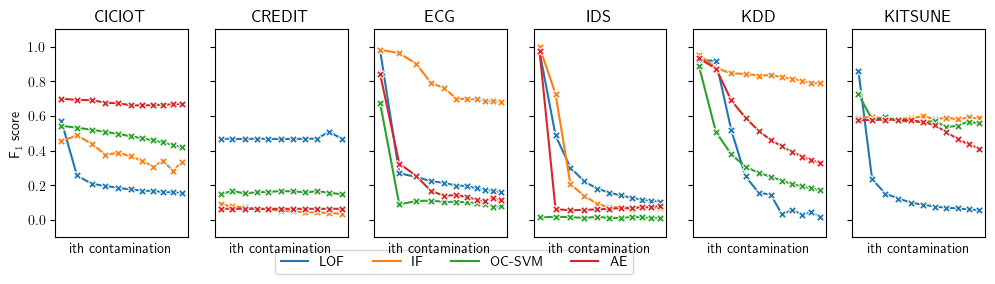

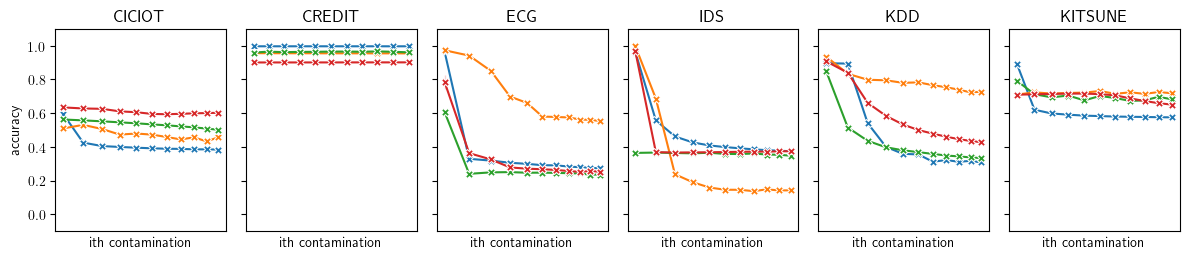

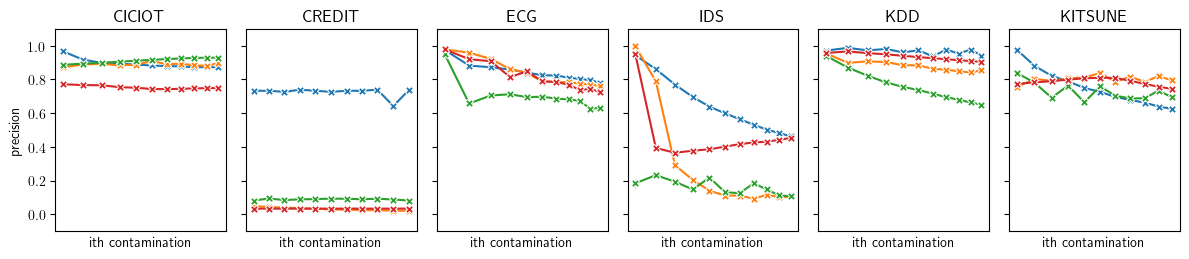

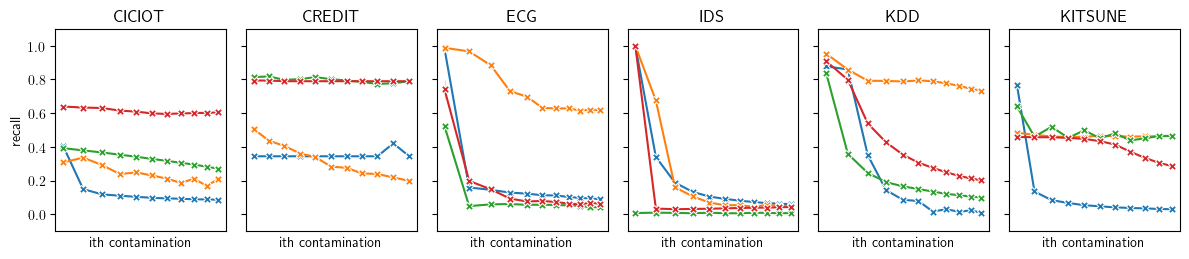

In [654]:
metrics = ["f1", "accuracy", "precision", "recall"]
for metric in metrics:
    degration = df_perf[~df_perf['model'].str.contains('Bopeto')]
    fig, axes = plt.subplots(ncols=6, figsize=(12, 2.7), sharey=True)
    for i, (ax, (subplot, df_group)) in enumerate(zip(axes, degration.groupby('dataset'))):
        sns.lineplot(data=df_group, x=df_group.contamination, y=metric, hue='model', ax=ax, marker='X')
        ax.set_title(f'{subplot}'.upper())
        ax.set_xlabel('ith contamination')
        ax.set_xticks([])
        if metric=="f1":
            ax.set_ylabel(r'F$_1$ score')
        else:
            ax.set_ylabel(metric)
        ax.set_ylim(-0.1, 1.1)
        if i != 0 or metric!="f1":
            ax.legend().remove()
        else:
            legend = ax.legend()
            if legend:
                for label in legend.get_texts():
                    label.set_fontsize('xx-small')
                    label.set_font('bold')
            ax.legend(loc='lower center', bbox_to_anchor=(3., -0.21), ncol=4)
            #ax.legend().get_frame().set_linewidth(1)
    plt.tight_layout()
    plt.savefig("degration_"+metric+".pdf")
    plt.show()

In [655]:
degration_perf = df_perf[~df_perf['model'].str.contains('Bopeto')]
degration_perf.groupby('dataset')['accuracy'].agg(['mean', 'std'])

,mean,std
dataset,,
ciciot,0.512875,0.080928
credit,0.953971,0.034721
ecg,0.445521,0.249541
ids,0.420108,0.236858
kdd,0.587015,0.224101
kitsune,0.690250,0.070161


In [656]:
degration_perf.groupby('model')['f1'].agg(['mean', 'std'])

,mean,std
model,,
AE,0.613412,0.247525
IF,0.292326,0.258831
LOF,0.220420,0.252135
OC-SVM,0.385683,0.262829


In [657]:
degration_perf.groupby('model')['precision'].agg(['mean', 'std'])

,mean,std
model,,
AE,0.715371,0.234660
IF,0.622614,0.360723
LOF,0.615458,0.310069
OC-SVM,0.697381,0.320848


In [658]:
degration_perf.groupby('model')['recall'].agg(['mean', 'std'])

,mean,std
model,,
AE,0.549726,0.258608
IF,0.333134,0.306565
LOF,0.211829,0.244442
OC-SVM,0.418349,0.286492


In [659]:
df_perf[df_perf['contamination']==0].head(10)

,dataset,contamination,model,accuracy,precision,recall,f1
232,ciciot,0.0,Bopeto_LOF,0.555958,0.955316,0.348637,0.510845
231,ciciot,0.0,LOF,0.595929,0.966523,0.406512,0.572313
254,ciciot,0.0,IF,0.511646,0.883257,0.306170,0.454718
255,ciciot,0.0,Bopeto_IF,0.615739,0.826745,0.534159,0.649000
253,ciciot,0.0,IF,0.506937,0.860755,0.308533,0.454245
230,ciciot,0.0,LOF,0.595929,0.966523,0.406512,0.572313
186,ciciot,0.0,Bopeto_AE,0.683622,0.804140,0.693103,0.744504
208,ciciot,0.0,OC-SVM,0.562402,0.886703,0.392123,0.543775
209,ciciot,0.0,Bopeto_OC-SVM,0.648063,0.826091,0.596370,0.692681
207,ciciot,0.0,OC-SVM,0.562402,0.886703,0.392123,0.543775


In [660]:
def sort_group(group):
    return group.sort_values(by='dataset')

In [661]:
df_perf.head()

,dataset,contamination,model,accuracy,precision,recall,f1
275,ciciot,0.254774,Bopeto_IF,0.554537,0.857230,0.396177,0.541907
250,ciciot,0.235291,Bopeto_LOF,0.407523,0.894008,0.123821,0.217515
249,ciciot,0.235291,LOF,0.385083,0.873212,0.088207,0.160229
248,ciciot,0.214762,Bopeto_LOF,0.406664,0.886205,0.123739,0.217157
247,ciciot,0.214762,LOF,0.385409,0.872490,0.088880,0.161325


In [662]:
ds = df_perf[(df_perf["dataset"]=='ciciot') & (df_perf["model"]=="LOF")]

ds[ds['contamination']==contamination[1]]

,dataset,contamination,model,accuracy,precision,recall,f1


In [663]:
models = ["AE", "OC-SVM", "LOF", "IF"]
names = ["CICIOT", "CREDIT", "ECG", "IDS", "KDD", "KITSUNE"]

In [664]:
def get_diff(model, dataset):
    n_db = pd.DataFrame([])
    ds = df_perf[(df_perf["dataset"]==dataset) & (df_perf["model"]==model)]
    ds_b = df_perf[(df_perf["dataset"]==dataset) & (df_perf["model"]=="Bopeto_"+model)]
    contamination = np.unique(ds["contamination"].values)
    diff_acc = []
    diff_f1 = []
    diff_prec = []
    diff_rec = []
    for c in contamination:
        acc = ds_b.loc[ds_b['contamination']==c, "accuracy"].values[0]
        acc -= ds.loc[ds['contamination']==c, "accuracy"].values[0]
        diff_acc.append(acc)
        f1 = ds_b.loc[ds_b['contamination']==c, "f1"].values[0]
        f1 -= ds.loc[ds['contamination']==c, "f1"].values[0]
        diff_f1.append(f1)
        prec = ds_b.loc[ds_b['contamination']==c, "precision"].values[0]
        prec -= ds.loc[ds['contamination']==c, "precision"].values[0]
        diff_prec.append(prec)
        rec = ds_b.loc[ds_b['contamination']==c, "recall"].values[0]
        rec -= ds.loc[ds['contamination']==c, "recall"].values[0]
        diff_rec.append(rec)
    n_db["accuracy"] = diff_acc
    n_db["precision"] = diff_prec
    n_db["f1"] = diff_f1
    n_db["recall"] = diff_rec
    n_db["contamination"] = contamination
    n_db["dataset"]=dataset
    n_db["model"] = model
    n_db["id"]=range(len(contamination))
    return n_db
    

In [665]:
get_diff("AE", "ciciot")

,accuracy,precision,f1,recall,contamination,dataset,model,id
0,0.048592,0.031893,0.044594,0.053139,0.000000,ciciot,AE,0
1,0.049686,0.033690,0.045460,0.053230,0.033057,ciciot,AE,1
2,0.049118,0.033131,0.045147,0.053057,0.063999,ciciot,AE,2
3,0.067000,0.046152,0.061573,0.071564,0.093022,ciciot,AE,3
4,0.066613,0.045809,0.061686,0.071854,0.120299,ciciot,AE,4
5,0.076932,0.053591,0.071358,0.082580,0.145983,ciciot,AE,5
6,0.078872,0.054149,0.073697,0.086053,0.170211,ciciot,AE,6
7,0.074991,0.052010,0.069797,0.080981,0.193101,ciciot,AE,7
8,0.063517,0.043703,0.059561,0.069473,0.214762,ciciot,AE,8
9,0.065452,0.044475,0.061430,0.072136,0.235291,ciciot,AE,9


In [666]:
difference = pd.DataFrame([])
for d_name in names:
    for m_name in models:
        difference = pd.concat([difference, get_diff(m_name, d_name.lower())], ignore_index=True)

In [667]:
difference.tail()

,accuracy,precision,f1,recall,contamination,dataset,model,id
259,-0.027588,-0.080479,-0.019774,0.005335,0.083032,kitsune,IF,6
260,-0.050921,-0.144796,-0.037737,0.006977,0.095550,kitsune,IF,7
261,-0.037719,-0.106370,-0.026262,0.007921,0.107730,kitsune,IF,8
262,-0.043808,-0.125451,-0.035589,0.001026,0.119587,kitsune,IF,9
263,-0.035354,-0.099441,-0.027699,0.002298,0.131133,kitsune,IF,10


/tmp/ipykernel_186992/2459800529.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


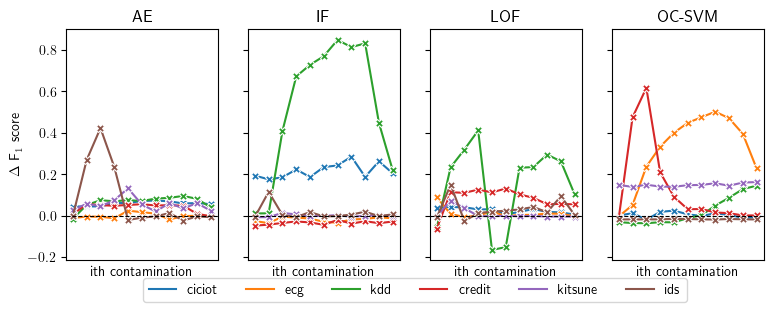

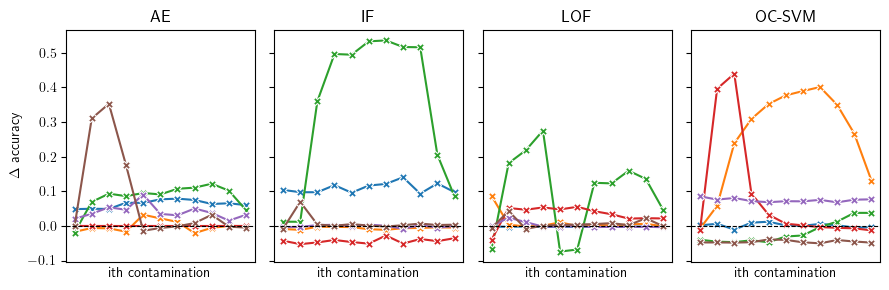

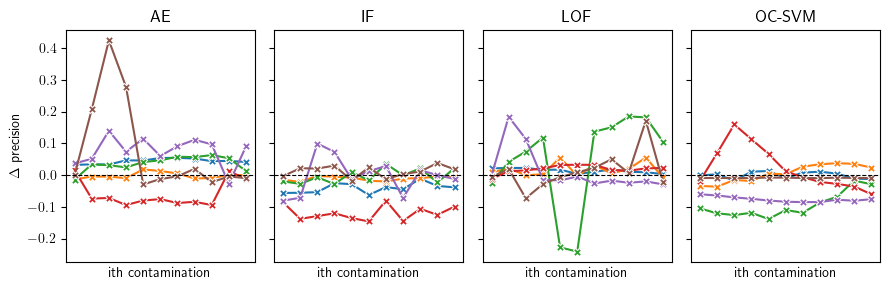

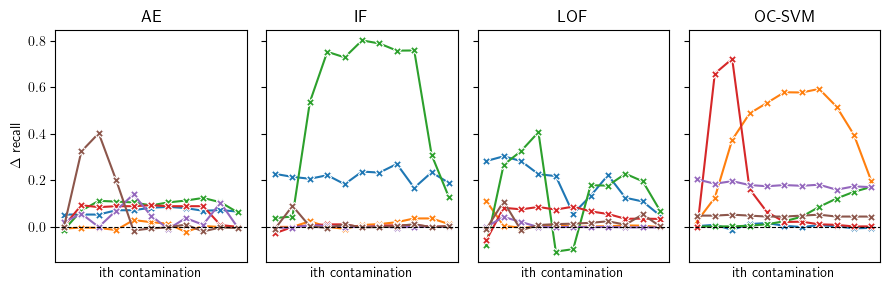

In [668]:
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'x', '+', '*']
for metric in metrics:
    robustness = difference.sort_values(by='contamination')
    fig, axes = plt.subplots(ncols=4, figsize=(9, 3), sharey=True)
    for i, (ax, (subplot, df_group)) in enumerate(zip(axes, robustness.groupby('model'))):
        sns.lineplot(data=df_group, x=df_group.id, y=metric, hue='dataset', ax=ax, marker='X')
        ax.set_title(f'{subplot}'.upper())
        ax.set_xlabel('ith contamination')
        ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
        ax.set_xticks([])
        if metric=="f1":
            ax.set_ylabel(r'$\Delta$ F$_1$ score')
        else:    
            ax.set_ylabel(r'$\Delta$ {}'.format(metric))

        if i != 0 or metric!="f1":
            ax.legend().remove()
        else:
            legend = ax.legend()
            if legend:
                for label in legend.get_texts():
                    label.set_fontsize('xx-small')
                    label.set_font('bold')
                ax.legend(loc='lower center', bbox_to_anchor=(2.3, -0.21), ncol=6)
    plt.tight_layout()
    plt.savefig(metric+"_difference.pdf")
    plt.show()

In [631]:
df_perf.groupby(['model', 'dataset'])['precision'].agg(['mean', 'std'])

mean       std
model         dataset                    
AE            ciciot   0.754431  0.011126
              credit   0.725752  0.026854
              ecg      0.849877  0.086603
              ids      0.337672  0.363391
              kdd      0.887664  0.038243
              kitsune  0.736833  0.059425
Bopeto_AE     ciciot   0.796570  0.004269
              credit   0.665483  0.034310
              ecg      0.836410  0.077161
              ids      0.354564  0.376398
              kdd      0.918276  0.021407
              kitsune  0.804213  0.044780
Bopeto_IF     ciciot   0.848929  0.012871
              credit   0.077764  0.005020
              ecg      0.831514  0.081514
              ids      0.162977  0.057289
              kdd      0.963128  0.009003
              kitsune  0.681047  0.014174
Bopeto_LOF    ciciot   0.911316  0.019623
              credit   0.045518  0.015752
              ecg      0.718401  0.085709
              ids      0.470992  0.169129
              kdd      0.800688  0.149797
              kitsune  0.762340  0.101159
Bopeto_OC-SVM ciciot   0.836750  0.009571
              credit   0.024591  0.000573
              ecg      0.841967  0.056300
              kdd      0.939292  0.010839
              kitsune  0.690596  0.024685
IF            ciciot   0.887487  0.011224
              credit   0.088008  0.005138
              ecg      0.832959  0.092066
              ids      0.163817  0.043662
              kdd      0.966777  0.015735
              kitsune  0.796635  0.024825
LOF           ciciot   0.898843  0.034136
              credit   0.033158  0.010417
              ecg      0.722298  0.110287
              ids      0.499213  0.212252
              kdd      0.770828  0.102030
              kitsune  0.768411  0.122894
OC-SVM        ciciot   0.910907  0.016261
              credit   0.033665  0.000056
              ecg      0.853495  0.064668
              kdd      0.935951  0.021234
              kitsune  0.784222  0.020931

In [633]:
for metric in metrics:
    for model in models:
        palette ={'Bopeto_'+model: 'blue', model: 'red'}
        robustness = df_perf[df_perf['model'].str.contains(model)]
        robustness = robustness.sort_values(by='dataset')
        fig, axes = plt.subplots(ncols=5, figsize=(16, 4), sharey=True)
        for i, (ax, (subplot, df_group)) in enumerate(zip(axes, robustness.groupby('dataset'))):
            sns.lineplot(data=df_group, x=df_group.contamination, y=metric, hue='model', ax=ax, marker='X', palette=palette)
            ax.set_title(f'{subplot}'.upper())
            ax.set_xlabel('contamination rate')
            if metric=="f1":
                ax.set_ylabel(r'F$_1$ score')
            else:
                ax.set_ylabel(metric)
            ax.set_ylim(-0.1, 1.1)

            if i != 0:
                ax.legend().remove()
        plt.tight_layout()
        plt.savefig(model+"_"+metric+"_robustness.pdf")
        plt.show()

RuntimeError: latex was not able to process the following string:
b'Bopeto_AE'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/local/USHERBROOKE/masj2413/.cache/matplotlib/tex.cache/79278f7fc5988b070
6652f0de8b80f5a.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 79278f7fc5988b0706652f0de8b80f5a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily Bopeto_
                       AE}
No pages of output.
Transcript written on 79278f7fc5988b0706652f0de8b80f5a.log.




RuntimeError: latex was not able to process the following string:
b'Bopeto_AE'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/local/USHERBROOKE/masj2413/.cache/matplotlib/tex.cache/79278f7fc5988b070
6652f0de8b80f5a.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 79278f7fc5988b0706652f0de8b80f5a.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\sffamily Bopeto_
                       AE}
No pages of output.
Transcript written on 79278f7fc5988b0706652f0de8b80f5a.log.




<Figure size 1600x400 with 5 Axes>

In [ ]:
df_group

In [634]:
dd_ecg = np.load("../data/ecg.npz", allow_pickle=True) 
dd_credit = np.load("../data/credit.npz", allow_pickle=True) 
data1_ecg = pd.DataFrame(dd_ecg['ecg'])
data1_credit = pd.DataFrame(dd_credit['credit'])

In [635]:
np.unique(data1_credit.values[:, -1])

array([0., 1.])

In [636]:
data1_kdd = pd.read_csv("kdd.csv")
data1_ids = pd.read_csv("ids.csv")
data1_ciciot = pd.read_csv("ciciot.csv")
data_kitsune = pd.read_csv("kitsune.csv")

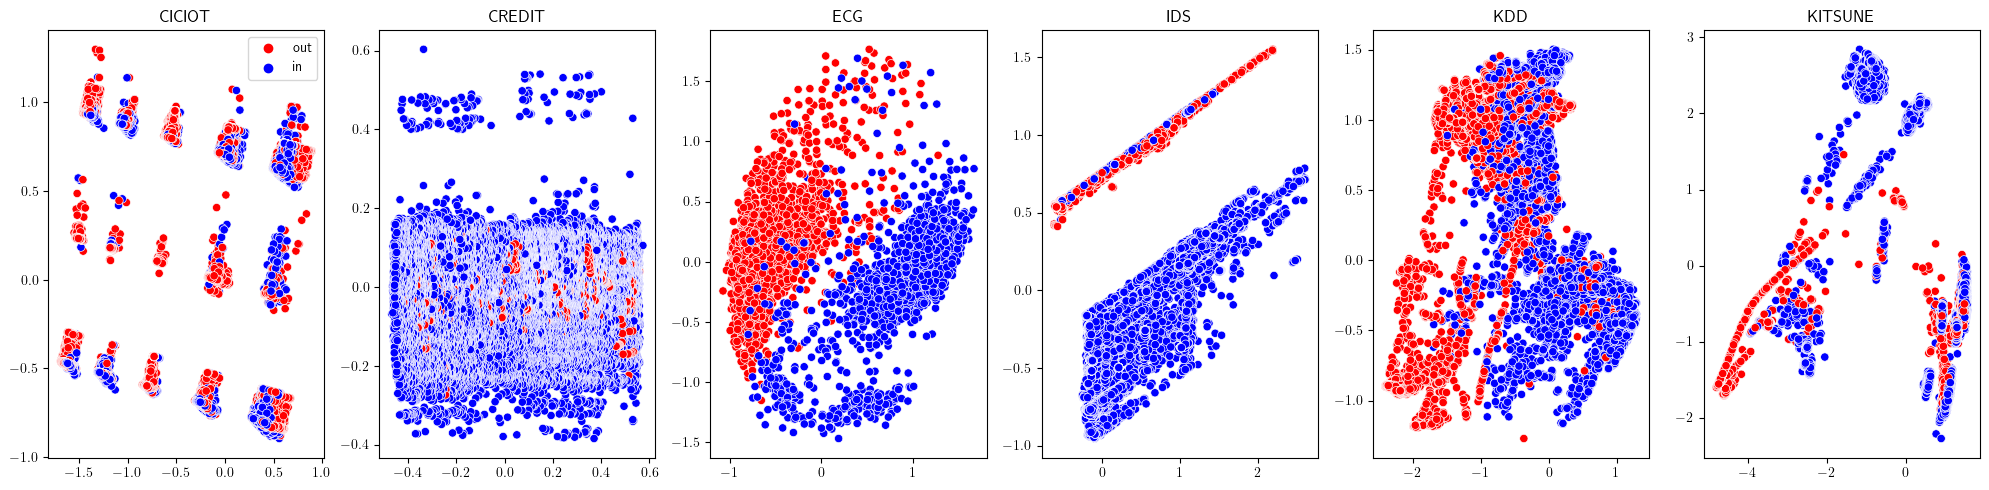

In [637]:

datasets = [data1_ciciot, data1_credit, data1_ecg, data1_ids, data1_kdd, data_kitsune]
pca = PCA(n_components=2)
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
replacement_dict = {
    0: 'in',
    1: 'out',
    2: 'synthetic'
}
for i, xy in enumerate(datasets):
    
    x, y = xy.values[:, :-1], xy.values[:, -1]
    reduced_data = pca.fit_transform(x)
    df_pca = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    df_pca['target'] = y
    df_pca['target'] = df_pca['target'].replace(replacement_dict)
    df_pca = df_pca[df_pca['target']!='synthetic']

    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', ax=axs[i], palette={'in':'blue', 'out':'red', 'synthetic':'green'}, legend=(i==0))
    axs[i].set_title(names[i])
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    if i == 0:
        axs[i].legend(title='')
    else:
        axs[i].legend([],[], frameon=False)

plt.tight_layout()
plt.savefig("synthetic.png")
plt.show()


In [427]:
def sdc(dynamics):
    return np.std(np.diff(dynamics, axis=1), axis=1)

In [428]:
kdd_1 = np.loadtxt("kdd_FGM_sdc_ae_rate_0.18821442994855225.csv", delimiter=',')
ids_1 = np.loadtxt("ids_FGM_sdc_ae_rate_0.15585998801128825.csv", delimiter=',')
credit_1 = np.loadtxt("credit_FGM_sdc_ae_rate_0.0012223312434517968.csv", delimiter=',')
ecg_1 = np.loadtxt("ecg_FGM_sdc_ae_rate_0.21916092673763307.csv", delimiter=',')
ciciot_1 = np.loadtxt("ciciot_FGM_sdc_ae_rate_0.19310100024086915.csv", delimiter=',')
kitsune_1 = np.loadtxt("kitsune_FGM_sdc_ae_rate_0.0701628076642476.csv", delimiter=',')

In [429]:
x_kdd, y_kdd = kdd_1[:, :-1], kdd_1[:, -1]
x_ids, y_ids = ids_1[:, :-1], ids_1[:, -1]
x_ciciot, y_ciciot = ciciot_1[:, :-1], ciciot_1[:, -1]
x_kitsune, y_kitsune = kitsune_1[:, :-1], kitsune_1[:, -1]
x_credit, y_credit = credit_1[:, :-1], credit_1[:, -1]
x_ecg, y_ecg = ecg_1[:, :-1], ecg_1[:, -1]

In [430]:
m = 'score'
mac_kdd = sdc(x_kdd)
mac_ids = sdc(x_ids)
mac_ciciot = sdc(x_ciciot)
mac_kitsune = sdc(x_kitsune)
mac_credit = sdc(x_credit)
mac_ecg = sdc(x_ecg)

In [431]:
mapping = {0: 'in', 1: 'out', 2:'synthetic'}
def clean(dynamics, target, n=1000):
    detector = IsolationForest(n_estimators=50, random_state=42)
    df = pd.DataFrame(data = dynamics, columns=[m])
    df['class'] = target
    df['class'] = df['class'].replace(mapping)
    y_pred = detector.fit_predict(dynamics.reshape(-1, 1))
    anomaly_scores = detector.decision_function(dynamics.reshape(-1, 1))
    out = anomaly_scores[y_pred==-1]
    in_ = anomaly_scores[y_pred==1]
    threshold = (np.max(out)+np.min(in_))/2
    threshold = np.percentile(out, np.random.randint(60, 70, 1)[0])
    y_pred = anomaly_scores >= threshold

    df[m] = anomaly_scores
    y = y_pred==1
    sample = df.sample(n=n)
    selected = df.index.isin(sample.index)
    cleaned = df[y & selected].copy()
    return sample, cleaned, threshold 

In [432]:
all_data = [clean(mac_ciciot, y_ciciot), clean(mac_credit, y_credit), 
            clean(mac_ecg, y_ecg), clean(mac_ids, y_ids), 
            clean(mac_kdd, y_kdd), clean(mac_kitsune, y_kitsune)]


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


           score      class
29      0.082244        out
206     0.087532         in
227     0.055014         in
375     0.009264         in
400     0.095848         in
...          ...        ...
172380 -0.123218         in
172559 -0.146487        out
173348  0.090851         in
173382 -0.140511         in
173512  0.037487  synthetic

[1000 rows x 2 columns]
           score class
1       0.048463    in
167    -0.076806    in
594     0.040114    in
1125    0.044236    in
1185    0.037886    in
...          ...   ...
131487  0.053540    in
131661  0.029253    in
131984 -0.036153    in
132206  0.059389    in
132271  0.039362    in

[1000 rows x 2 columns]
         score class
1     0.056741    in
2     0.041945    in
3     0.019619    in
4     0.017714    in
5    -0.014064    in
...        ...   ...
1750  0.045978    in
1751  0.010825    in
1752  0.052922    in
1754 -0.004694    in
1755  0.025733    in

[1000 rows x 2 columns]
           score class
79      0.067968    in
655     0.00876

No handles with labels found to put in legend.


           score      class
124     0.053788         in
184    -0.091856        out
434     0.079059         in
546     0.063662         in
737     0.073112         in
...          ...        ...
114293  0.079974  synthetic
114494  0.035518         in
114549  0.070705         in
114567  0.035008         in
114576  0.004740         in

[1000 rows x 2 columns]


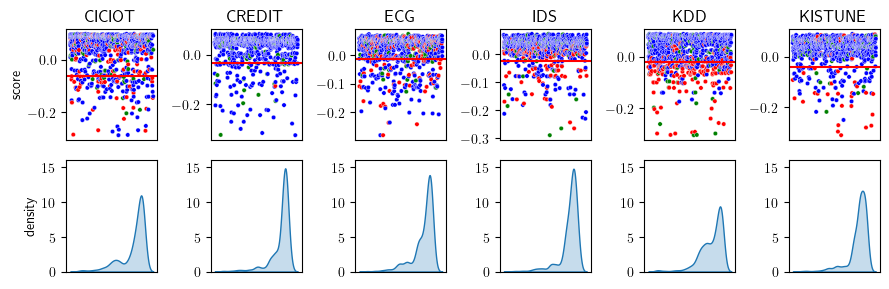

In [590]:
fig, axes = plt.subplots(2, 6, figsize=(9, 3))
datasets = ["CICIOT", "CREDIT", "ECG", "IDS", "KDD", "KISTUNE"]
palette = {"out":"red", "synthetic":"green", "in":"blue"}
for i, df in enumerate(all_data):
    for j in range(1):
        d = df[j]
        d = d.sort_index()
        ax = axes[0, i]
        sns.scatterplot(data=d, x=d.index, y=m, hue='class', ax=ax, palette=palette, s=10)
        ax.axhline(y=df[2], color='r', linestyle='-')

        if j==0:
            ax.set_title(datasets[i])
        if i!=0 or j!=1:
            ax.legend().remove()
        else:
            legend = ax.legend()
            if legend:
                for label in legend.get_texts():
                    label.set_fontsize('xx-small')
        
        
        ax.set_xticks([])
        ax = axes[1, i]
        sns.kdeplot(d, fill=True, ax=ax)
        ax.legend().remove()
        ax.set_xticks([])
        if i!=0:
            axes[0, i].set_ylabel('')
            axes[1, i].set_ylabel('')
        else:
            axes[1, 0].set_ylabel('density')
        ax.set_ylim(0, 16)
plt.tight_layout()
plt.savefig("dynamics_space.png")
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)
thresholds = [0.008, 0.015, 0.02]
for i, df in enumerate([df_kdd.sample(n=1000), df_ciciot.sample(n=1000), df_kitsune.sample(n=1000)]):
    ax = axes[i]
    sns.scatterplot(data=df, x=df.index, y=m, hue='class', ax=ax, palette=palette)
    ax.set_title(datasets[i])
    ax.axhline(y=thresholds[i], color='r', linestyle='-')
    if i!=0:
        ax.legend().remove()
    ax.set_xticks([])
plt.tight_layout()
plt.savefig("dynamics_space_threshold.png")
plt.show()


    